# Risk Analysis of Covid19 Virus

As the
outbreak of coronavirus disease 2019 (COVID-19) progresses, epidemiological data are needed to guide situational awareness and intervention strategies. The enormous impact of the COVID-19 pandemic is obvious. What many still haven’t realized, however, is that the impact on ongoing data science production setups has been dramatic, too. Artificial Intelligence is actively used in identifying high risk patients at an earlier stage and therefore helps to control the spread of the infection in real-time. This becomes particularly important at this time of crisis because real time monitoring is the best option for people to self-isolate and mitigate the spread of the virus.


Objective: This is an open-research project that a healthcare institute will use to determine the risk factor of second-level contacts traced for a COVID19 Positive patient. This study will also lead to deciding which all factors should be considered for a healthcare institute to open a dedicated testing-quarantine labs and/or predict the possibility of a zone turning into a hotspot.

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np

#visualisation library
import matplotlib.pyplot as plt
import seaborn as sns

#library for machine learning algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


#disable warnings
import warnings
warnings.filterwarnings('ignore')

D:\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Data Collection:Get the data from APIs

https://www.covid19india.org/ provides a volunteer-driven, crowd-sourced database for COVID-19 stats & patient tracing in India. Data has been collected from https://www.covid19india.org/ using API,where data is distributed in 13 raw files datewise.The data present in raw_data csv file are either - individual records or district level records. Some of these district level records might have district name as empty or Unknown. 

In [9]:
df1=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data1.csv')
df2=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data2.csv')
df3=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data3.csv')
df4=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data4.csv')
df5=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data5.csv')
df6=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data6.csv')
df7=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data7.csv')
df8=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data8.csv')
df9=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data9.csv')
df10=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data10.csv')
df11=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data11.csv')
df12=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data12.csv')
df13=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data13.csv')


In [10]:
df1.head()

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num Cases
0,1.0,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,...,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1
1,2.0,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,...,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1
2,3.0,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,...,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,1
3,4.0,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,...,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,1
4,5.0,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,...,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",1


In [11]:
#identify dataframe features
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17364 entries, 0 to 17363
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient Number                             17306 non-null  float64
 1   State Patient Number                       2457 non-null   object 
 2   Date Announced                             17364 non-null  object 
 3   Estimated Onset Date                       0 non-null      float64
 4   Age Bracket                                1670 non-null   object 
 5   Gender                                     3746 non-null   object 
 6   Detected City                              2166 non-null   object 
 7   Detected District                          14978 non-null  object 
 8   Detected State                             17363 non-null  object 
 9   State code                                 17363 non-null  object 
 10  Current Status        

In [12]:
df1.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Estimated Onset Date', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Notes', 'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes', 'Num Cases'],
      dtype='object')

In [13]:
df3.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

In [14]:
df13.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

In [15]:
#rename column Num cases of df1,df2
df1.rename(columns={"Num cases":"Num Cases"},inplace=True)
df2.rename(columns={"Num cases":"Num Cases"},inplace=True)


In [16]:
df3.shape

(10020, 20)

# Features Set Description:


    1. Patient Number:This field used to hold a global patient number for all patients being reported. This has been discontinued with the shift to district level entries.
    2. Num Cases: This field can any integer value. This field denotes the following:
            If the value is == 1 : The row indicates an individual record (age and gender info are subject to state bulletin releases).
            If the value != 1 (greater than or less than 1) : The row indicates a district level record.
            If the value > 0 and (detecteddistrict == ‘’ or detecteddistrict == ‘Unknown’) : The row added without district details as state bulletin did not have district details at the point of data entry.
            If the value < 0 and (detecteddistrict == ‘’ or detecteddistrict == ‘Unknown’) : The row added to adjust a previously added bulk entry as stated above
            If the value < 0 and (detecteddistrict != ‘’ and detecteddistrict != ‘Unknown’) : The row added due to state bulletins providing a reduced count for that district/day/category combination.
            If the value == 0 : Ingore the record. This would’ve been an entry made and ignored later due to clarifications from state bulletins.
    3. Date Announced: This field gives the date on which the case(s) was reported by the state/central bulletin
    4. Age Bracket: This provides the age of the case. This is applicable only for rows that represent individual records.
    5. Gender: This provides the gender of the case. This is applicable only for rows that represent individual records.
    6. Detected City:
    7. Detected District:
    8. Detected State:
    9. Contracted from which Patient (Suspected):This field gives the patient id from whom the current patient is believed to have contracted the virus. This is based on state bulletins. As of July 10th, this field is used only for Karnataka records.
    10. Current Status:This can have: Hospitalized, Recovered, Deceased or Migrated_Others as values. These represent the status of the case. Migrated_Others is used as a place holder for those cases that are marked by states as having migrated to other states or have died due to non covid reasons.

In [17]:
#extract necessary features
df1=df1.loc[:,['Patient Number','Num Cases','Date Announced', 'Age Bracket','Gender', 'Detected City', 'Detected District', 'Detected State', 'Contracted from which Patient (Suspected)','Current Status']]
df2=df2.loc[:,['Patient Number','Num Cases','Date Announced', 'Age Bracket','Gender', 'Detected City', 'Detected District', 'Detected State', 'Contracted from which Patient (Suspected)','Current Status']]
df3=df3.loc[:,['Patient Number','Num Cases','Date Announced', 'Age Bracket','Gender', 'Detected City', 'Detected District', 'Detected State', 'Contracted from which Patient (Suspected)','Current Status']]
df4=df4.loc[:,['Patient Number','Num Cases','Date Announced', 'Age Bracket','Gender', 'Detected City', 'Detected District', 'Detected State', 'Contracted from which Patient (Suspected)','Current Status']]
df5=df5.loc[:,['Patient Number','Num Cases','Date Announced', 'Age Bracket','Gender', 'Detected City', 'Detected District', 'Detected State', 'Contracted from which Patient (Suspected)','Current Status']]
df6=df6.loc[:,['Patient Number','Num Cases','Date Announced', 'Age Bracket','Gender', 'Detected City', 'Detected District', 'Detected State', 'Contracted from which Patient (Suspected)','Current Status']]
df7=df7.loc[:,['Patient Number','Num Cases','Date Announced', 'Age Bracket','Gender', 'Detected City', 'Detected District', 'Detected State', 'Contracted from which Patient (Suspected)','Current Status']]
df8=df8.loc[:,['Patient Number','Num Cases','Date Announced', 'Age Bracket','Gender', 'Detected City', 'Detected District', 'Detected State', 'Contracted from which Patient (Suspected)','Current Status']]
df9=df9.loc[:,['Patient Number','Num Cases','Date Announced', 'Age Bracket','Gender', 'Detected City', 'Detected District', 'Detected State', 'Contracted from which Patient (Suspected)','Current Status']]
df10=df10.loc[:,['Patient Number','Num Cases','Date Announced', 'Age Bracket','Gender', 'Detected City', 'Detected District', 'Detected State', 'Contracted from which Patient (Suspected)','Current Status']]
df11=df11.loc[:,['Patient Number','Num Cases','Date Announced', 'Age Bracket','Gender', 'Detected City', 'Detected District', 'Detected State', 'Contracted from which Patient (Suspected)','Current Status']]
df12=df12.loc[:,['Patient Number','Num Cases','Date Announced', 'Age Bracket','Gender', 'Detected City', 'Detected District', 'Detected State', 'Contracted from which Patient (Suspected)','Current Status']]
df13=df13.loc[:,['Patient Number','Num Cases','Date Announced', 'Age Bracket','Gender', 'Detected City', 'Detected District', 'Detected State', 'Contracted from which Patient (Suspected)','Current Status']]


In [29]:
#Merge all data frames
df=df1.append([df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13],sort=True,ignore_index=True)

In [30]:
#Split date into day,month,year
date_ann=df['Date Announced'].str.split("/",expand=True)
date_ann.columns=['Day','Month','Year']
#Concat columns in original Dataframe
df=pd.concat([df,date_ann],axis=1)

In [31]:
#Final dataframe
print(df.head())
print(df.info())
print(df.isnull().sum())

  Age Bracket Contracted from which Patient (Suspected) Current Status  \
0          20                                       NaN      Recovered   
1         NaN                                       NaN      Recovered   
2         NaN                                       NaN      Recovered   
3          45                                       NaN      Recovered   
4          24                                       NaN      Recovered   

  Date Announced             Detected City Detected District Detected State  \
0     30/01/2020                  Thrissur          Thrissur         Kerala   
1     02/02/2020                 Alappuzha         Alappuzha         Kerala   
2     03/02/2020                 Kasaragod         Kasaragod         Kerala   
3     02/03/2020  East Delhi (Mayur Vihar)        East Delhi          Delhi   
4     02/03/2020                 Hyderabad         Hyderabad      Telangana   

  Gender  Num Cases  Patient Number Day Month  Year  
0      F        1.0       

In [40]:
#convert the merged dataframe to csv file
df.to_csv("covid-19India.csv")

# Read Final Dataframe

In [2]:
#Read dataset
final_df=pd.read_csv("covid-19India.csv")
final_df=final_df.reset_index(drop=True)
final_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [3]:
final_df.head()

,Age Bracket,Contracted from which Patient (Suspected),Current Status,Date Announced,Detected City,Detected District,Detected State,Gender,Num Cases,Patient Number,Day,Month,Year
0,20,NaN,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,F,1.0,1.0,30.0,1.0,2020.0
1,NaN,NaN,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,NaN,1.0,2.0,2.0,2.0,2020.0
2,NaN,NaN,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,NaN,1.0,3.0,3.0,2.0,2020.0
3,45,NaN,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,M,1.0,4.0,2.0,3.0,2020.0
4,24,NaN,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,M,1.0,5.0,2.0,3.0,2020.0


In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250422 entries, 0 to 250421
Data columns (total 13 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Age Bracket                                108168 non-null  object 
 1   Contracted from which Patient (Suspected)  1924 non-null    object 
 2   Current Status                             248944 non-null  object 
 3   Date Announced                             248975 non-null  object 
 4   Detected City                              12067 non-null   object 
 5   Detected District                          239760 non-null  object 
 6   Detected State                             248922 non-null  object 
 7   Gender                                     110938 non-null  object 
 8   Num Cases                                  248943 non-null  float64
 9   Patient Number                             99793 non-null   float64
 10  Day     

In [5]:
final_df.Gender.unique()

array(['F', nan, 'M', 'Non-Binary', 'M ', 'M,', 'Femal e'], dtype=object)

In [7]:
#Rename Age Bracket column 
final_df.rename(columns={"Age Bracket":"Age"},inplace=True)
final_df["Current Status"].replace({"Migrated_other":"Migrated_Other"},inplace=True)
final_df["Gender"].replace({'Femal e':'F','M ':'M','M,':'M'},inplace=True)

In [8]:
final_df.columns

Index(['Age', 'Contracted from which Patient (Suspected)', 'Current Status',
       'Date Announced', 'Detected City', 'Detected District',
       'Detected State', 'Gender', 'Num Cases', 'Patient Number', 'Day',
       'Month', 'Year'],
      dtype='object')

In [9]:

#checking % of missing values
print("Fature\t\t\t\t\t% of Missing Values")
np.round(final_df.isnull().mean()*100,2).sort_values(ascending=False)

Fature					% of Missing Values


Contracted from which Patient (Suspected)    99.23
Detected City                                95.18
Patient Number                               60.15
Age                                          56.81
Gender                                       55.70
Detected District                             4.26
Detected State                                0.60
Num Cases                                     0.59
Current Status                                0.59
Year                                          0.58
Month                                         0.58
Day                                           0.58
Date Announced                                0.58
dtype: float64

# Exploratory Data Analysis


Hospitalized      176317
Recovered          59876
Deceased           12587
Migrated_Other       160
Migrated               4
Name: Current Status, dtype: int64


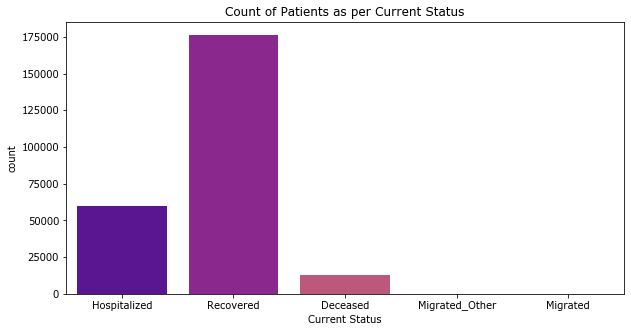

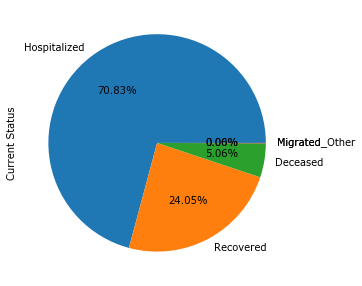

In [10]:
#Create copy of dataframe 
df_analysis=final_df.copy()
#df_analysis["Current Status"].replace({"Migrated_other":"Migrated_Other"},inplace=True)
    
#Count of target Feature
print(df_analysis['Current Status'].value_counts())

plt.figure(figsize=(10,5))
plt.title("Count of Patients as per Current Status")
sns.countplot(df_analysis['Current Status'],palette='plasma')
plt.xticks(ticks=np.arange(5),labels=['Hospitalized','Recovered','Deceased','Migrated_Other','Migrated'])
plt.show()
    
plt.figure(figsize=(5,5))
df_analysis['Current Status'].value_counts().plot(kind='pie',labels=['Hospitalized','Recovered','Deceased','Migrated_Other','Migrated'],autopct="%1.2f%%")
plt.show()

M             72455
F             38465
Non-Binary       18
Name: Gender, dtype: int64


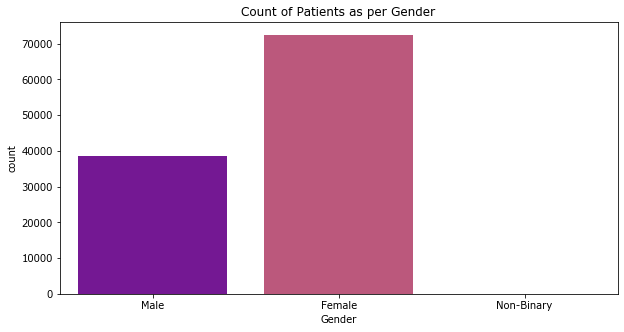

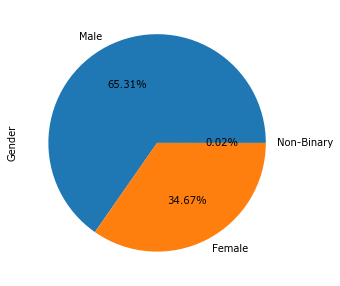

In [12]:
#Checking Genderwise patient count

#Count of Patients Genderwise
print(df_analysis['Gender'].value_counts())

plt.figure(figsize=(10,5))
plt.title("Count of Patients as per Gender")
sns.countplot(df_analysis['Gender'],palette='plasma')
plt.xticks(ticks=np.arange(3),labels=['Male','Female','Non-Binary'])
plt.show()
    
plt.figure(figsize=(5,5))
df_analysis['Gender'].value_counts().plot(kind='pie',labels=['Male','Female','Non-Binary'],autopct="%1.2f%%")
plt.show()


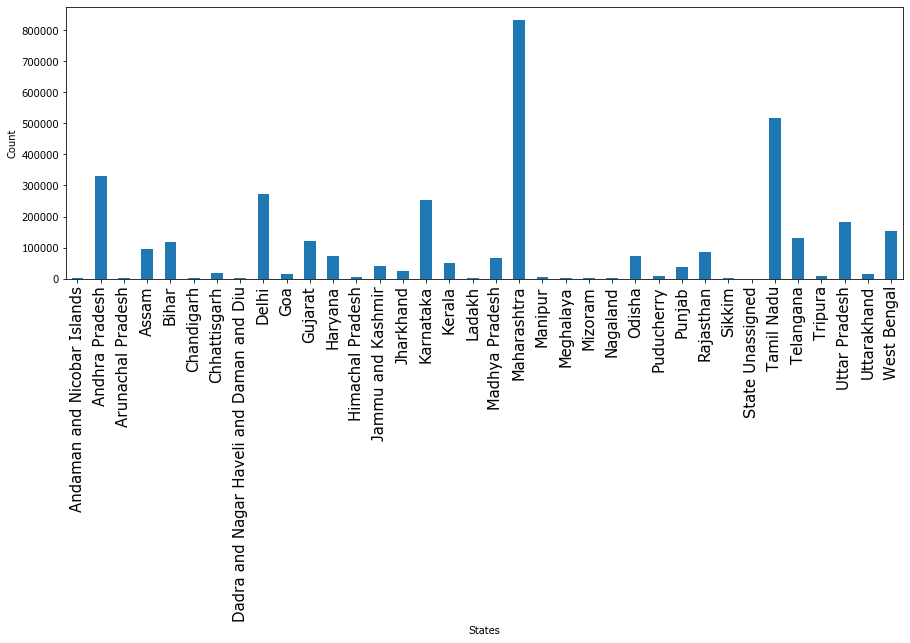

In [58]:
#Statewise/Districtwise/citywise Patient Count
plt.figure(figsize=(15,5))
df_analysis.groupby('Detected State')['Num Cases'].sum().plot.bar()
plt.xlabel("States")
plt.ylabel("Count")
plt.xticks(fontsize=15,rotation=90)
plt.show()
#Maharashtra has majority of cases 


Districtwise patient count


Text(0, 0.5, 'Count')

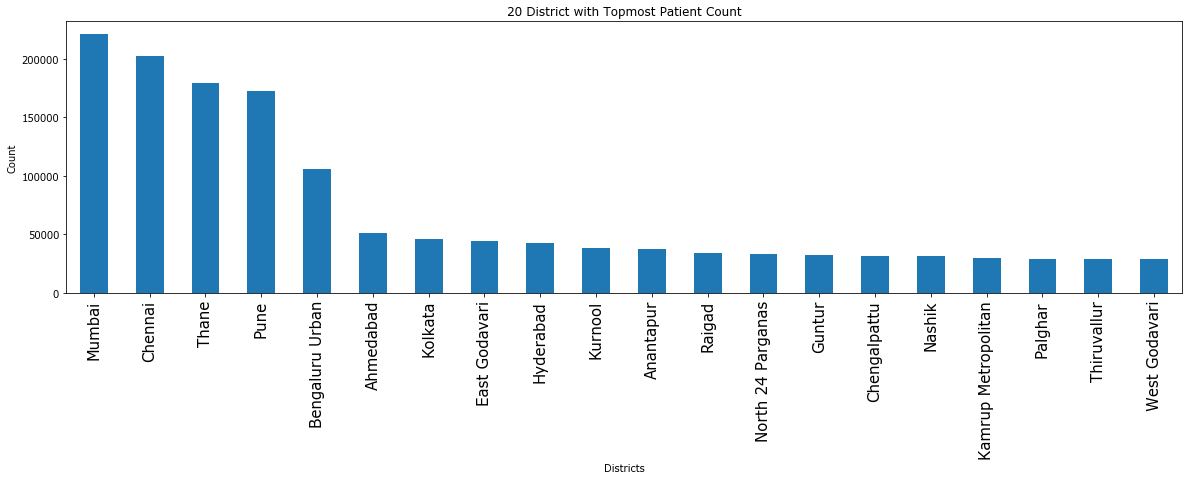

In [55]:
#Districtwise patient count
print("Districtwise Patient Count")
pd.set_option("display.max_rows",None)
plt.figure(figsize=(20,5))
df_analysis.groupby('Detected District')['Num Cases'].sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title("20 District with Topmost Patient Count")
plt.xlabel("Districts")
plt.xticks(fontsize=15)
plt.ylabel("Count")

Districtwise patient count


Text(0, 0.5, 'Count')

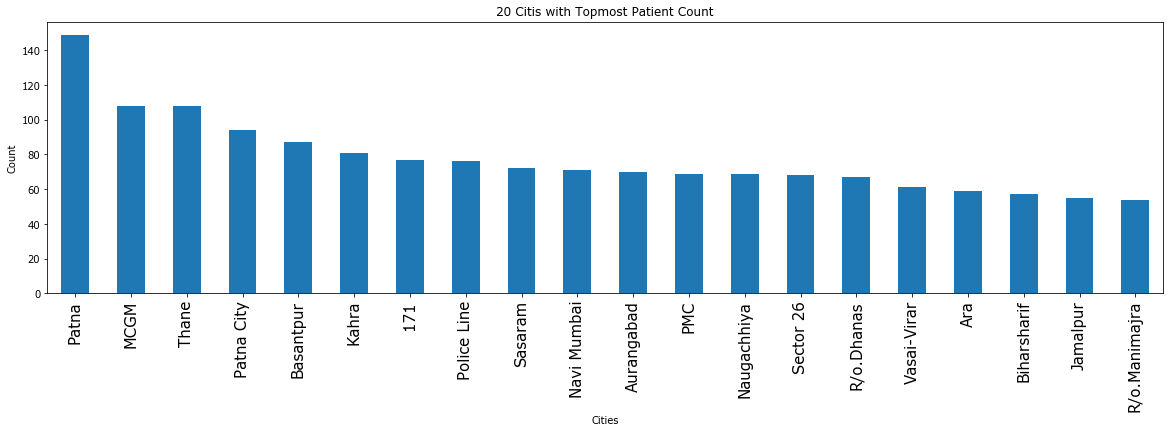

In [57]:
#Districtwise patient count
print("Citywise Patient Count")
pd.set_option("display.max_rows",None)
plt.figure(figsize=(20,5))
df_analysis.groupby('Detected City')['Num Cases'].sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title("20 Citis with Topmost Patient Count")
plt.xlabel("Cities")
plt.xticks(fontsize=15)
plt.ylabel("Count")

Age-groupwise Patient Count


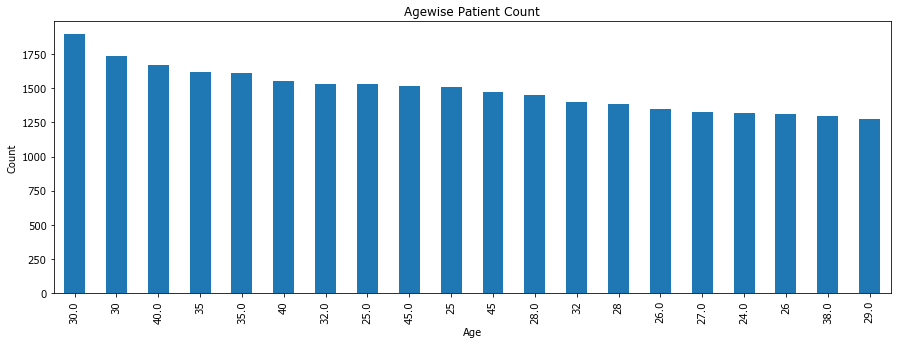

In [72]:
# Which Age group is affected the most
print("Age-groupwise Patient Count")
plt.figure(figsize=(15,5))
plt.title("Agewise Patient Count")
Age_patient=df_analysis.groupby('Age')['Num Cases'].sum().sort_values(ascending=False)
plt.ylabel("Count")
Age_patient.head(20).plot(kind='bar')

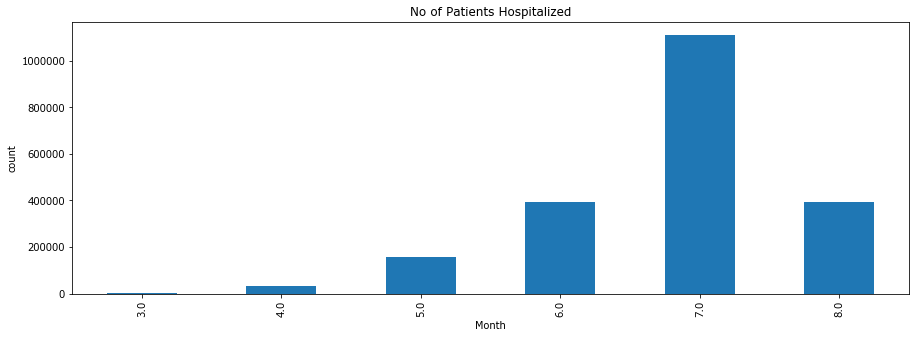

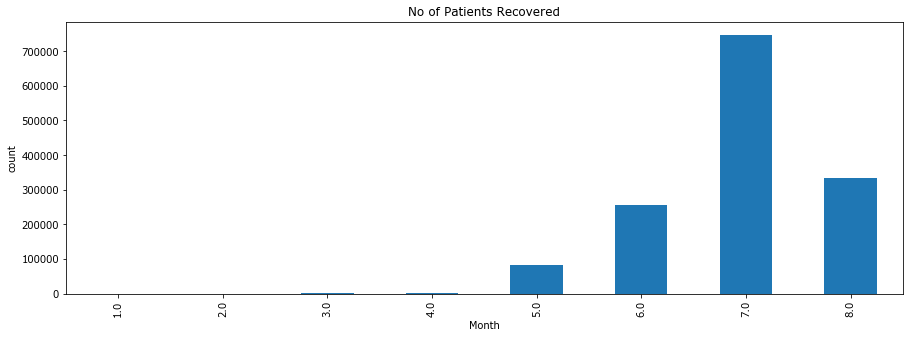

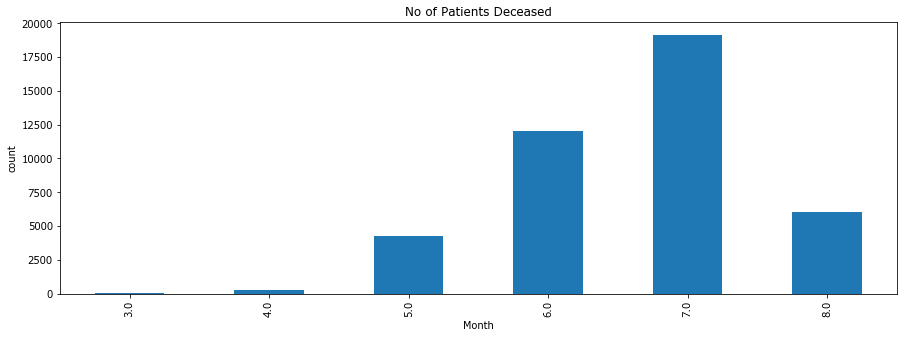

In [79]:
#Covid cases(Hospitalized,Recovered,Deceased) Monthwise
plt.figure(figsize=(15,5))
plt.title("No of Patients Hospitalized")
h=df_analysis[df_analysis['Current Status']=='Hospitalized'].groupby('Month')['Num Cases'].sum()
plt.xlabel("Month")
plt.ylabel("count")
h.plot.bar()
plt.show()

plt.figure(figsize=(15,5))
plt.title("No of Patients Recovered")
h=df_analysis[df_analysis['Current Status']=='Recovered'].groupby('Month')['Num Cases'].sum()
plt.xlabel("Month")
plt.ylabel("count")
h.plot.bar()
plt.show()

plt.figure(figsize=(15,5))
plt.title("No of Patients Deceased")
h=df_analysis[df_analysis['Current Status']=='Deceased'].groupby('Month')['Num Cases'].sum()
plt.xlabel("Month")
plt.ylabel("count")
h.plot.bar()
plt.show()


